# Prediction using Supervised ML
### Task : Predict the percentage of an student based on the no. of study hours. 

## Data  Wrangling Process

In [17]:
# Importing Libraries


import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline


In [18]:
# Data Upload and Reading Process

data = pd.read_csv('http://bit.ly/w-data')

data.head(7)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [19]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [21]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

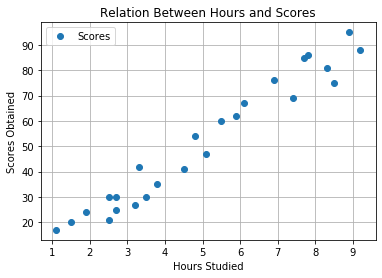

In [22]:
# Data Pre Visualization

data.plot(x = 'Hours', y = 'Scores', style ='o')

plt.title('Relation Between Hours and Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.grid(True)

plt.show()

# Machine Learning Module Setting

.

In [23]:
#Importing Libraries (Machine Learning)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score

### Here we do spliting of our data set in 30/70 part ,
   #### 30% part is to be used as test dataset on  our module 
   #### 70% part is use as to train our module 

In [24]:
# Assignement and Training of module

x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


### Applying Simple Learning Regression Algorithm

.

In [25]:
l_reg = LinearRegression()
l_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

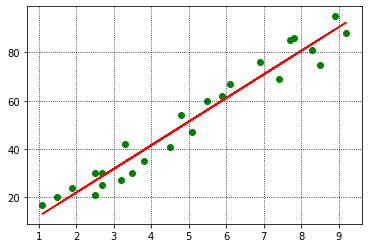

In [35]:
linear = l_reg.coef_ * x + l_reg.intercept_

plt.scatter(x, y,color = 'green')
plt.plot(x, linear , color ='red')
plt.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')
        
plt.show()

In [27]:
print("Intercept = ",l_reg.intercept_)

print("Coefficient = ",l_reg.coef_)

Intercept =  2.370815382341881
Coefficient =  [9.78856669]


##  Predicting Results from module

In [40]:


y_pred = l_reg.predict(x_test)

print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [29]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## Data Visualization

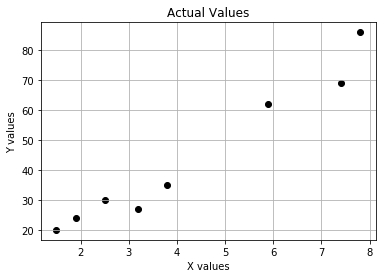

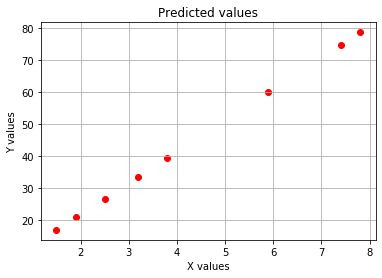

In [39]:


plt.scatter(x_test ,y_test, color ='black')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.title("Actual Values")
plt.show()

plt.scatter(x_test,y_pred ,color ='red')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.grid(True)
plt.title('Predicted values')
plt.show()

In [31]:
# Error analysis

print('Mean Absolute Error = ', metrics.mean_absolute_error(y_test,y_pred))

print('Mean Squared Test = ', metrics.mean_squared_error(y_test,y_pred))

print('Root Mean Squared Error = ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error =  4.419727808027652
Mean Squared Test =  22.96509721270043
Root Mean Squared Error =  4.792191274636315


In [32]:
# Accuracy analysis

accuracy = r2_score(y_test,y_pred)*100
print('Accuracy = ',accuracy)

Accuracy =  95.68211104435257


#  Question In Task

What will be predicted score if a student studies for 9.25 hrs/ day?

In [33]:
# define input
new_input = [[9.5]]
# get prediction for new input
new_output = float(l_reg.predict(new_input))
print('The predicted score is', new_output)

The predicted score is 95.36219890645782
